# Simple Linear Regression

We will show how to use linear regression to find a best fit line through an artificial 2D scatter plot generated from a line with Gaussian noise added.

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

from mltools.glm import LinearRegression

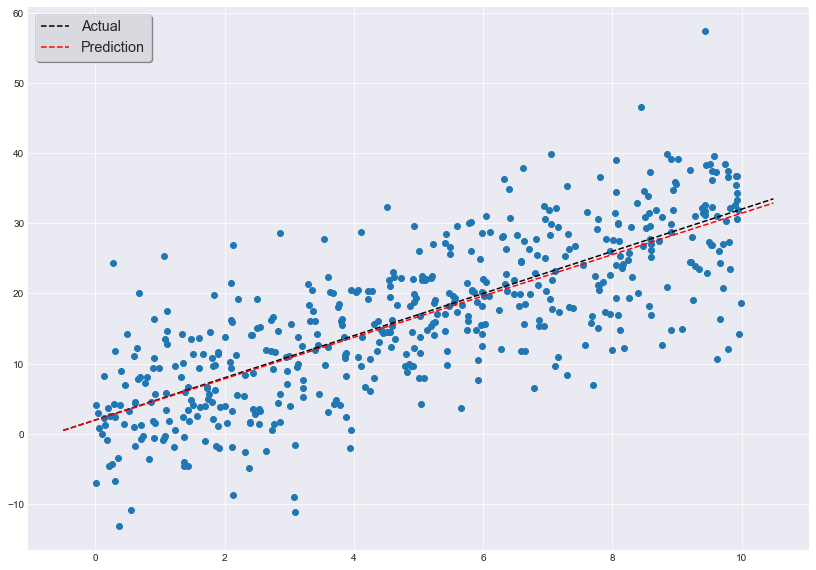

In [2]:
n = 500
slope = 3
intercept = 2

np.random.seed(100)
x = np.random.uniform(0, 10, n)
y = slope * x + intercept + np.random.normal(0, 7, n)

lm = LinearRegression()
lm.fit(x, y)

plt.figure(figsize=(14, 10))
sns.set_style("darkgrid")
plt.scatter(x, y)

t = np.array(plt.gca().get_xlim())
plt.plot(t, slope * t + intercept, "--", c="k", label="Actual")
plt.plot(t, lm.predict(t), "--", c="r", label="Prediction")

plt.legend(loc="best", fontsize="x-large", frameon=True, shadow=True)

plt.show()
plt.close()

## Mean Squared Error

To evaluate this model's performance, we compute its *mean squared error* on the data set:
$$
\mathrm{MSE} = \frac{1}{n} \sum_{i=1}^n \left(y_i - \widehat{y}_i\right)^2.
$$
Here $n$ is the number of observations, $y_i$ is the $i$th observed value, and $\widehat{y}_i$ is the least squares estimate corresponding to the $i$th data point.
A good regressor achieves an MLE close to zero.

In [3]:
y_true = slope * x + intercept
y_pred = lm.predict(x)
mse = mean_squared_error(y_true, y_pred)
print(f"MSE: {mse:.5f}")

MSE: 0.11550
